In [1]:
# importing required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score,accuracy_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

# EDA

In [2]:
# figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

In [3]:
bank = pd.read_csv('/Users/bryton/Desktop/DataSets-main/bank-additional/bank-additional-full.csv', sep=';')

In [4]:
bank.shape

(41188, 21)

In [5]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
bank.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [7]:
print(bank.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

1. there are no null values in our dataset
2. there are 10 numerical features and 10 categorial features

## [Attribute Information](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing):

## Input variables:
### bank client data:
1 - age (numeric)\
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')\
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)\
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')\
5 - default: has credit in default? (categorical: 'no','yes','unknown')\
6 - housing: has housing loan? (categorical: 'no','yes','unknown')\
7 - loan: has personal loan? (categorical: 'no','yes','unknown')\
### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')\
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')\
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')\
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)\
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)\
14 - previous: number of contacts performed before this campaign and for this client (numeric)\
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')\
### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)\
17 - cons.price.idx: consumer price index - monthly indicator (numeric)\
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)\
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)\
20 - nr.employed: number of employees - quarterly indicator (numeric)\

## Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [8]:
bank.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [9]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Target variable y

no     36548
yes     4640
Name: y, dtype: int64


<AxesSubplot:xlabel='y', ylabel='count'>

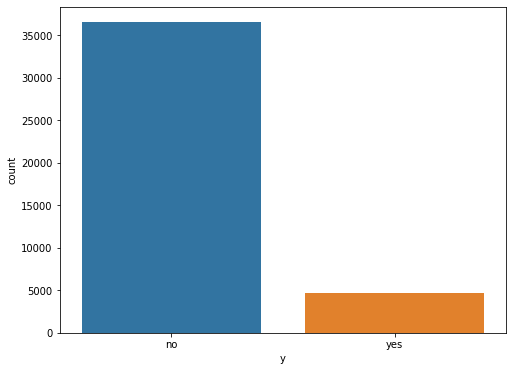

In [10]:
# count plot for deposit
print(bank['y'].value_counts())
sns.countplot(data=bank,x=bank['y'])

#### Note: The dataset is highly imbalanced, we could not simply look at the accuracy since it can't work well with highly imbalanced data, thus we choose ROC-AUC as our metric

### Age

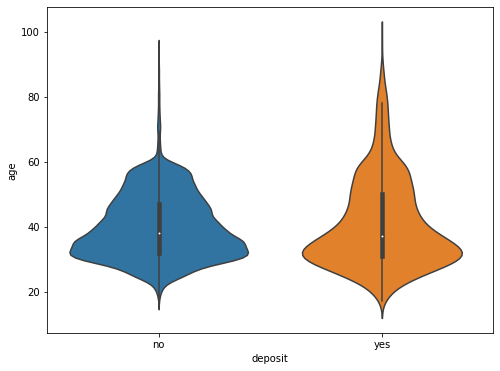

In [11]:
#violin plot for age
sns.violinplot(x="y", y="age", data=bank, size=8)
plt.xlabel('deposit')
plt.show()

For age feature, the client subscribed a term deposit('yes') is has more spread than client who do not subscribe to a term deposit('no') .

### Job

In [12]:
bank["job"].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

<AxesSubplot:xlabel='job'>

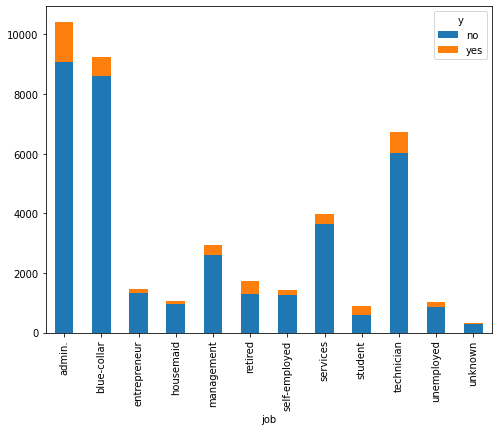

In [13]:
job_types = bank.groupby("job")['y'].value_counts(normalize=False).unstack()
job_types.plot(kind='bar', stacked='True')

The largest clients in this category belong to admin jobs with percentage of 30 while unknown category has least count.

### Marital

<AxesSubplot:xlabel='marital'>

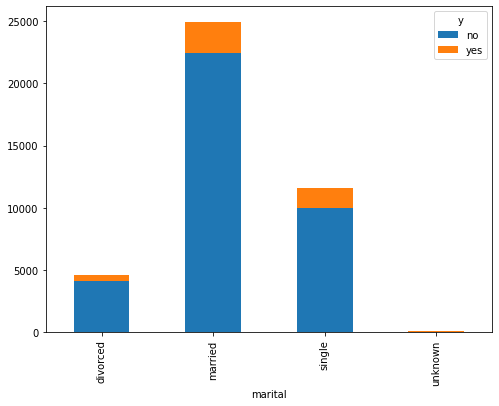

In [14]:
marital_types = bank.groupby("marital")['y'].value_counts(normalize=False).unstack()
marital_types.plot(kind='bar', stacked='True')

Married clients constitute the largest portion of this feature.

### Education

In [15]:
bank["education"].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

<AxesSubplot:xlabel='education'>

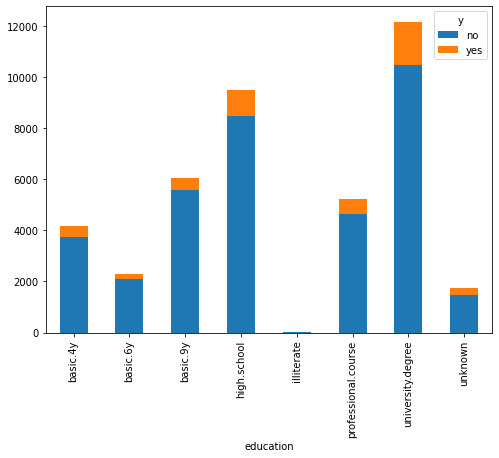

In [16]:
education_types = bank.groupby("education")['y'].value_counts(normalize=False).unstack()
education_types.plot(kind='bar', stacked='True')

Most of the bank clients have a university degree. The clients has university degree education has larger ratio of clients saying yes to term deposit than any other category.

### Default

In [17]:
bank["default"].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

<AxesSubplot:xlabel='default'>

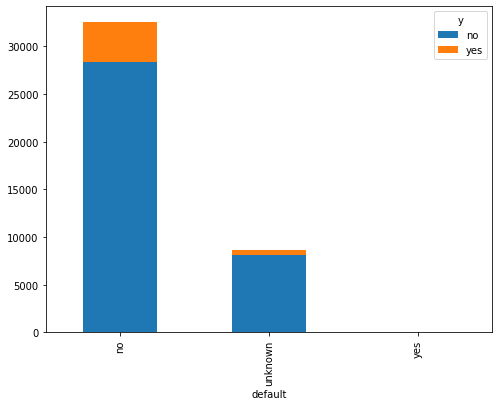

In [18]:
default_types = bank.groupby("default")['y'].value_counts(normalize=False).unstack()
default_types.plot(kind='bar', stacked='True')

Most of bank clients don’t have credit as default.

### Housing

In [19]:
bank["housing"].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

<AxesSubplot:xlabel='housing'>

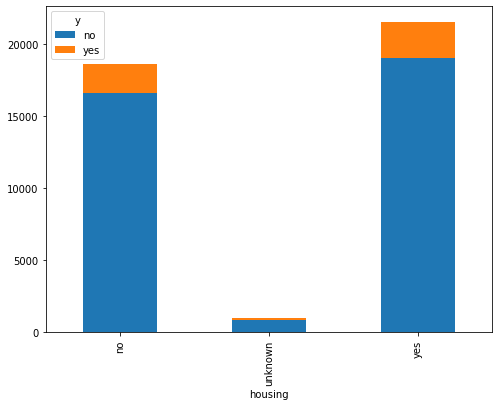

In [20]:
housing_types = bank.groupby("housing")['y'].value_counts(normalize=False).unstack()
housing_types.plot(kind='bar', stacked='True')

Most of the clients tends to do not subscribe to the term deposit.

### Loan

In [21]:
bank["loan"].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

<AxesSubplot:xlabel='loan'>

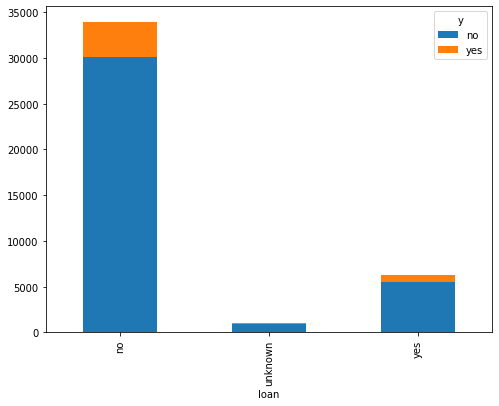

In [22]:
loan_types = bank.groupby("loan")['y'].value_counts(normalize=False).unstack()
loan_types.plot(kind='bar', stacked='True')

Most of the bank client don’t already have personal loan in bank.

### Contact

In [23]:
bank['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

<AxesSubplot:xlabel='contact'>

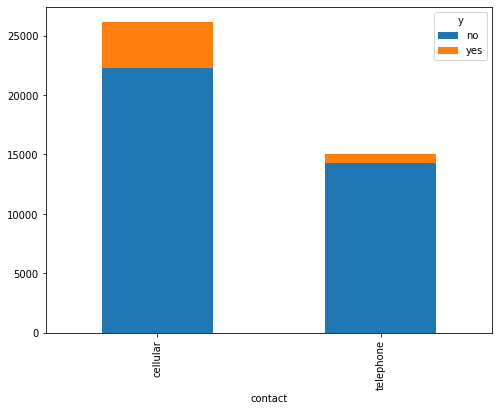

In [24]:
contact_types = bank.groupby("contact")['y'].value_counts(normalize=False).unstack()
contact_types.plot(kind='bar', stacked='True')

Most of the contact were conducted by cellular.

### Month

In [25]:
bank['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

<AxesSubplot:xlabel='month'>

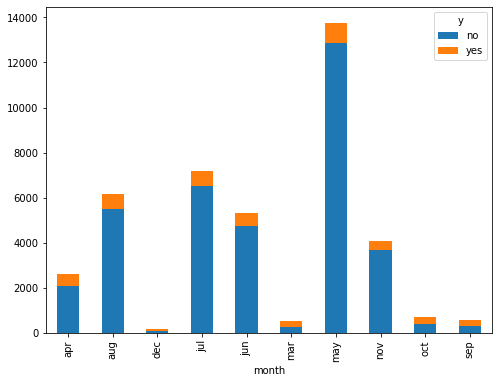

In [26]:
month_types = bank.groupby("month")['y'].value_counts(normalize=False).unstack()
month_types.plot(kind='bar', stacked='True')

Data for Janurary and Feberary is missing. Maximum clients were contacted in May.

### day of week

In [27]:
bank["day_of_week"].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

<AxesSubplot:xlabel='day_of_week'>

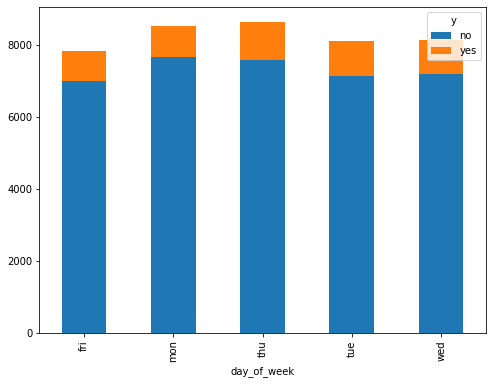

In [28]:
day_types = bank.groupby("day_of_week")['y'].value_counts(normalize=False).unstack()
day_types.plot(kind='bar', stacked='True')

Typically, client were contacted in Monday, Thursday in the week

### Duration

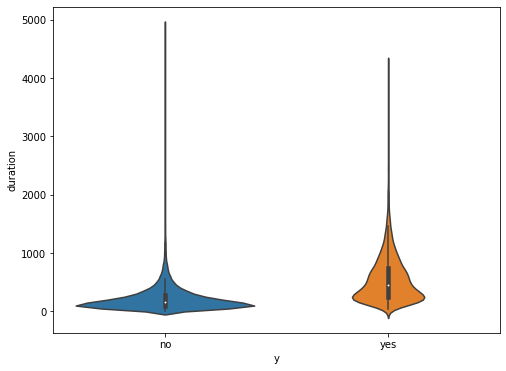

In [29]:
sns.violinplot(x="y", y="duration", data=bank, size=8)
plt.show()

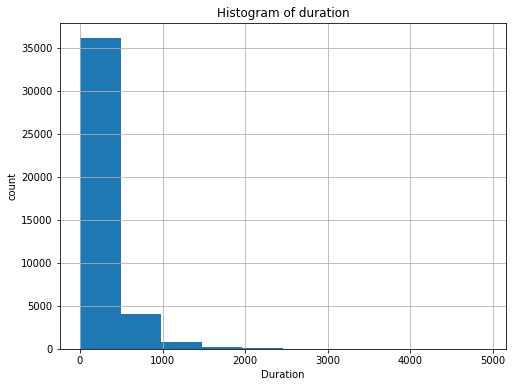

In [30]:
bank['duration'].hist()
plt.title('Histogram of duration')
plt.ylabel('count')
plt.xlabel('Duration')
plt.show()

A histogram is plotted for this and there are very less number of clients having very long duration. Violin plot indicates that people with longer duration have more possibility of saying yes to deposit.

### Campaign

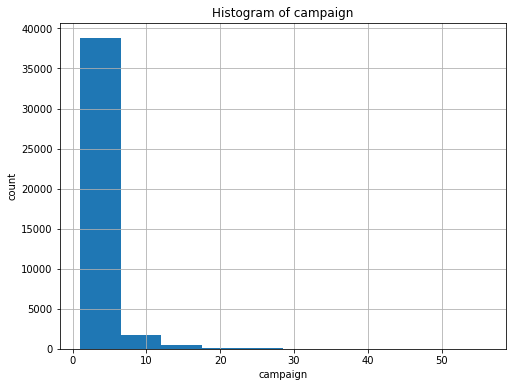

In [31]:
bank['campaign'].hist()
plt.title('Histogram of campaign')
plt.ylabel('count')
plt.xlabel('campaign');
plt.show()

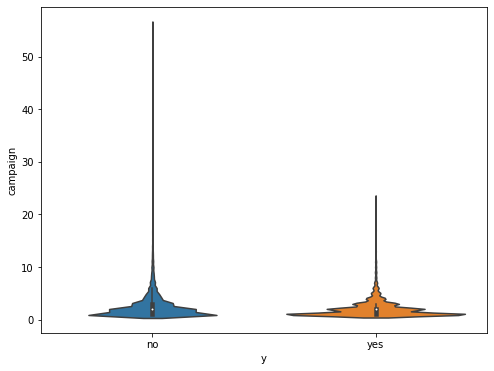

In [32]:
#violin plot for campaign
sns.violinplot(x="y", y="campaign", data=bank, size=8)
plt.show()

Number of contacts to a specific client performed during a campaign is less than 5 times.

### pdays

In [33]:
bank['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

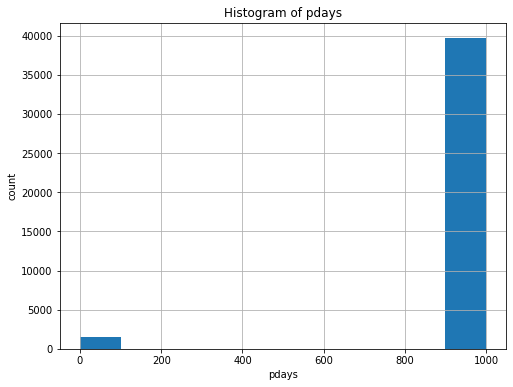

In [34]:
bank['pdays'].hist()
plt.title('Histogram of pdays')
plt.ylabel('count')
plt.xlabel('pdays')
plt.show()

Most of the bank clients were not previously contacted so the 'pdays' shows '999'

### Previous

In [35]:
bank['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

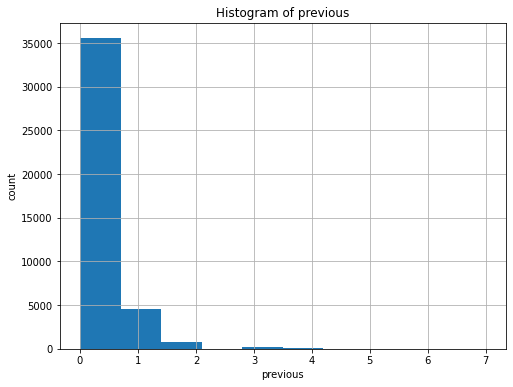

In [36]:
bank['previous'].hist()
plt.title('Histogram of previous')
plt.ylabel('count')
plt.xlabel('previous')
plt.show()

Typically, a client would not be contact more than 6 times in during a campaign. The histogram shows most of the bank client were not contacted.

### poutcome

In [37]:
bank["poutcome"].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

<AxesSubplot:xlabel='poutcome'>

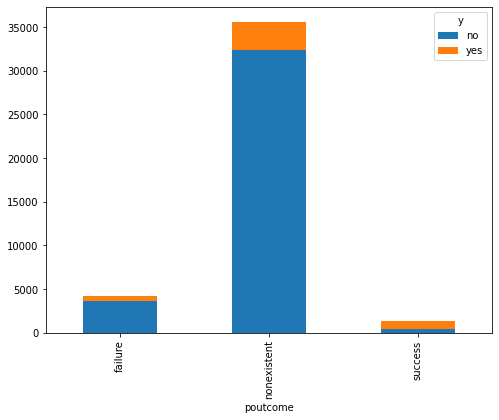

In [38]:
# bar chart for poutcome
poutcome_types = bank.groupby("poutcome")['y'].value_counts(normalize=False).unstack()
poutcome_types.plot(kind='bar', stacked='True')

The outcome of previous marketing campaign. The picture shows that many of the bank client were not contact in the previous campaign.

# Preprocessing

In [39]:
#changing the value 999 in pdays column to  value 0 
def change(row):
    if(row['pdays']==999):
        return 0;
    return row['pdays'];
bank['pdays']= bank.apply(lambda row: change(row),axis=1)

#changing the type of pdays to int
bank['pdays']=bank['pdays'].astype(int)
bank.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1      0         0  nonexistent          1.1   
1   may         mon  ...         1      0         0  nonexistent          1.1   
2   may         mon  ...         1      0         0  nonexistent          1.1   
3   may         mon  ...         1      0         0  nonexistent          1.1   
4   may         mon  ...         1      0         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [40]:
bank_onehot = bank.copy(deep = True)

In [41]:
idx_numeric=[0,10,11,12,13,15,16,17,18,19]
scaler = StandardScaler()
bank_onehot[bank_onehot.columns[idx_numeric]] = scaler.fit_transform(bank_onehot[bank_onehot.columns[idx_numeric]])

In [42]:
bank_onehot.head()

age        job  marital    education  default housing loan    contact  \
0  1.533034  housemaid  married     basic.4y       no      no   no  telephone   
1  1.628993   services  married  high.school  unknown      no   no  telephone   
2 -0.290186   services  married  high.school       no     yes   no  telephone   
3 -0.002309     admin.  married     basic.6y       no      no   no  telephone   
4  1.533034   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign     pdays  previous     poutcome  \
0   may         mon  ... -0.565922 -0.164012 -0.349494  nonexistent   
1   may         mon  ... -0.565922 -0.164012 -0.349494  nonexistent   
2   may         mon  ... -0.565922 -0.164012 -0.349494  nonexistent   
3   may         mon  ... -0.565922 -0.164012 -0.349494  nonexistent   
4   may         mon  ... -0.565922 -0.164012 -0.349494  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0     0.648092        0.722722       0.886447    0.71246      0.33168  no  
1     0.648092        0.722722       0.886447    0.71246      0.33168  no  
2     0.648092        0.722722       0.886447    0.71246      0.33168  no  
3     0.648092        0.722722       0.886447    0.71246      0.33168  no  
4     0.648092        0.722722       0.886447    0.71246      0.33168  no  

[5 rows x 21 columns]

### One-Hot Encoding

1. Algorithms like KNN, Naive bayes, Logistic Regression and SVM require Standardised Data
2. Tree based Algorithms are scale independant

In [43]:
nominal = ['job','marital','education','contact','month','day_of_week']
bank_onehot = pd.get_dummies(bank_onehot,columns=nominal)
bank_onehot['y']=bank_onehot['y'].map({'yes': 1,'no': 0})

In [44]:
bank_onehot['poutcome'] = bank_onehot['poutcome'].map({'failure': -1,'nonexistent': 0,'success': 1})
bank_onehot['default'] = bank_onehot['default'].map({'yes': -1,'unknown': 0,'no': 1})
bank_onehot['housing'] = bank_onehot['housing'].map({'yes': -1,'unknown': 0,'no': 1})
bank_onehot['loan'] = bank_onehot['loan'].map({'yes': -1,'unknown': 0,'no': 1})
bank_onehot.head()

age  default  housing  loan  duration  campaign     pdays  previous  \
0  1.533034        1        1     1  0.010471 -0.565922 -0.164012 -0.349494   
1  1.628993        0        1     1 -0.421501 -0.565922 -0.164012 -0.349494   
2 -0.290186        1       -1     1 -0.124520 -0.565922 -0.164012 -0.349494   
3 -0.002309        1        1     1 -0.413787 -0.565922 -0.164012 -0.349494   
4  1.533034        1        1    -1  0.187888 -0.565922 -0.164012 -0.349494   

   poutcome  emp.var.rate  ...  month_mar  month_may  month_nov  month_oct  \
0         0      0.648092  ...          0          1          0          0   
1         0      0.648092  ...          0          1          0          0   
2         0      0.648092  ...          0          1          0          0   
3         0      0.648092  ...          0          1          0          0   
4         0      0.648092  ...          0          1          0          0   

   month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  \
0          0                0                1                0   
1          0                0                1                0   
2          0                0                1                0   
3          0                0                1                0   
4          0                0                1                0   

   day_of_week_tue  day_of_week_wed  
0                0                0  
1                0                0  
2                0                0  
3                0                0  
4                0                0  

[5 rows x 56 columns]

In [45]:
bank_onehot.columns

Index(['age', 'default', 'housing', 'loan', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of

### Correlation with target variable

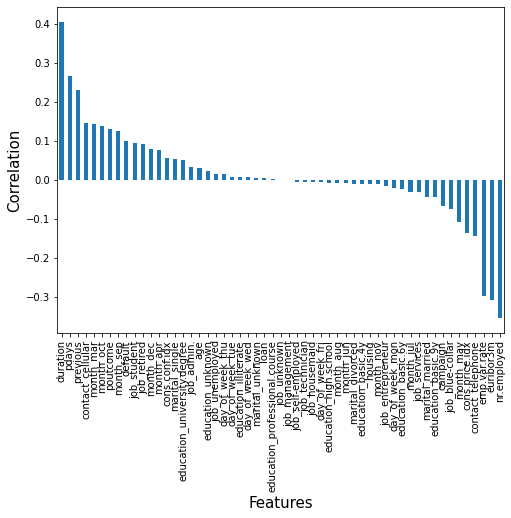

In [46]:
CorrBank1=bank_onehot.drop("y", axis=1).apply(lambda x: x.corr(bank_onehot.y))
Corr1=CorrBank1.sort_values(ascending=False)
Corr1.plot.bar()
plt.xlabel("Features", fontsize=15)
plt.ylabel("Correlation", fontsize=15)
plt.show()

1. As can be seen from the plot duration is a very important feature. This is the duration of last call with client.
2. If the call duration is more , there are higher chances of getting a yes from the client.
3. pdays , previous, month, age are also highly correlated

### Label Encoding

In [47]:
le = LabelEncoder()
bank_le = bank.copy(deep = True)

idx_numeric=[0,10,11,12,13,15,16,17,18,19]
scaler = MinMaxScaler()
bank_le[bank_le.columns[idx_numeric]] = scaler.fit_transform(bank_le[bank_le.columns[idx_numeric]])

bank_le.job = le.fit_transform(bank.job)
bank_le.marital = le.fit_transform(bank.marital)
bank_le.education = le.fit_transform(bank.education)
bank_le.default = le.fit_transform(bank.default)
bank_le.housing = le.fit_transform(bank.housing)
bank_le.loan = le.fit_transform(bank.loan)
bank_le.contact = le.fit_transform(bank.contact)
bank_le.month = le.fit_transform(bank.month)
bank_le.day_of_week = le.fit_transform(bank.day_of_week)
bank_le.poutcome = le.fit_transform(bank.poutcome)
bank_le.y = le.fit_transform(bank.y)
bank_le.head()

age  job  marital  education  default  housing  loan  contact  month  \
0  0.481481    3        1          0        0        0     0        1      6   
1  0.493827    7        1          3        1        0     0        1      6   
2  0.246914    7        1          3        0        2     0        1      6   
3  0.283951    0        1          1        0        0     0        1      6   
4  0.481481    7        1          3        0        0     2        1      6   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1  ...       0.0    0.0       0.0         1        0.9375   
1            1  ...       0.0    0.0       0.0         1        0.9375   
2            1  ...       0.0    0.0       0.0         1        0.9375   
3            1  ...       0.0    0.0       0.0         1        0.9375   
4            1  ...       0.0    0.0       0.0         1        0.9375   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0        0.698753        0.60251   0.957379     0.859735  0  
1        0.698753        0.60251   0.957379     0.859735  0  
2        0.698753        0.60251   0.957379     0.859735  0  
3        0.698753        0.60251   0.957379     0.859735  0  
4        0.698753        0.60251   0.957379     0.859735  0  

[5 rows x 21 columns]

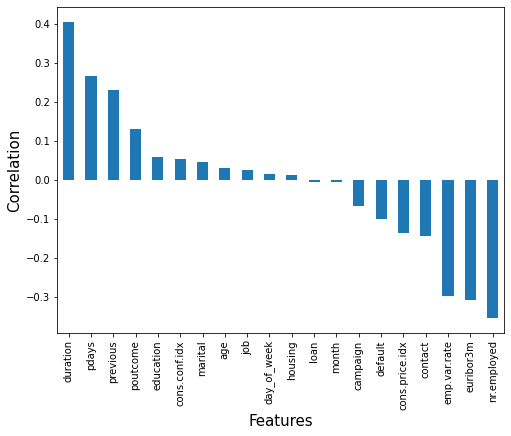

In [48]:
CorrBank2=bank_le.drop("y", axis=1).apply(lambda x: x.corr(bank_le.y))
Corr2=CorrBank2.sort_values(ascending=False)
Corr2.plot.bar()
plt.xlabel("Features", fontsize=15)
plt.ylabel("Correlation", fontsize=15)
plt.show()

1. As can be seen from the plot duration is a very important feature. This is the duration of last call with client.
2. If the call duration is more , there are higher chances of getting a yes from the client.
3. pdays , previous, previous contact, education, age are also highly correlated

## Train Test Split

In [49]:
y_onehot = bank_onehot['y']
y_le = bank_le['y']

In [50]:
bank_onehot.drop(['y'], axis = 1, inplace = True)
bank_le.drop(['y'], axis = 1 , inplace = True)

In [51]:
# 20% Data is set aside for tesing
X_train_onehot, X_test_onehot, y_train_onehot, y_test_onehot = train_test_split(bank_onehot, y_onehot, test_size=0.20, random_state=0)
#X_train_onehot, X_cv_onehot, y_train_onehot, y_cv_onehot = train_test_split(X_train_onehot, y_train_onehot, test_size=0.20, random_state=0)
X_train_le, X_test_le, y_train_le, y_test_le = train_test_split(bank_le, y_le, test_size=0.20, random_state=0)
#X_train_le, X_cv_le, y_train_le, y_cv_le = train_test_split(X_train_le, y_train_le, test_size=0.20, random_state=0)

# Modeling

## Naïve Bayes - Baseline

In [52]:
gnb = GaussianNB()
#gnb_X_train = pd.concat([X_train_onehot, X_cv_onehot], ignore_index= True)
#gnb_y_train = pd.concat([y_train_onehot, y_cv_onehot], ignore_index= True)
gnb.fit(X_train_onehot, y_train_onehot)
gnb_pred = gnb.predict(X_test_onehot)

accNB = accuracy_score(y_test_onehot, gnb_pred)

y_train_pred_prob = gnb.predict_proba(X_train_onehot)
y_test_pred_prob = gnb.predict_proba(X_test_onehot)
train_auc_NB = roc_auc_score(y_train_onehot, y_train_pred_prob[:,1])
test_auc_NB = roc_auc_score(y_test_onehot,  y_test_pred_prob[:,1])
fprNB_train, tprNB_train, thresholds_train = roc_curve(y_train_onehot, y_train_pred_prob[:,1])
fprNB_test, tprNB_test, thresholds_test = roc_curve(y_test_onehot, y_test_pred_prob[:,1])
aucScoreNB = roc_auc_score(y_test_onehot,  gnb_pred)
recallLR=recall_score(y_test_onehot, gnb_pred)

predT=gnb.predict(X_train_onehot)

print(confusion_matrix(y_test_onehot,gnb_pred))
print(classification_report(y_test_onehot,gnb_pred))
print("Train AUC score for NB is ",train_auc_NB)
print("Test AUC score for NB is ",test_auc_NB)

print("Train Accuracy score for NB is ",accuracy_score(y_train_onehot, predT))
# print("Best parameters for NB are ",gnb.best_params_)
print("Recall score for NB is ",recall_score(y_test_onehot, gnb_pred))

[[6675  644]
 [ 421  498]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      7319
           1       0.44      0.54      0.48       919

    accuracy                           0.87      8238
   macro avg       0.69      0.73      0.70      8238
weighted avg       0.88      0.87      0.88      8238

Train AUC score for NB is  0.8357640321596941
Test AUC score for NB is  0.8415625198385825
Train Accuracy score for NB is  0.8647040971168437
Recall score for NB is  0.5418933623503809


Note that although we calculate the accuracy score for Naïve Bayes method here, we still choose AUC score as our metrics since the dataset is highly imbalanced.

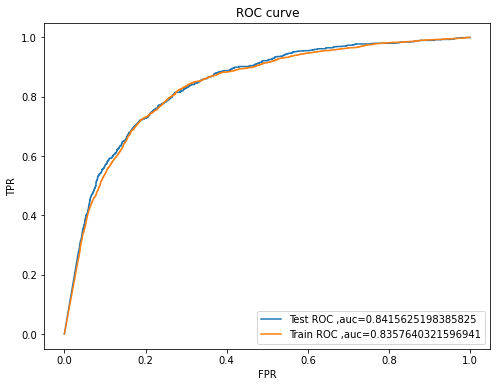

---------------------------
AUC on Test data is 0.8415625198385825
AUC on Train data is 0.8357640321596941


In [53]:
#plot ROC curve
x_nb = plt.subplot()
x_nb.plot(fprNB_test, tprNB_test, label ='Test ROC ,auc='+str(test_auc_NB))
x_nb.plot(fprNB_train, tprNB_train, label= 'Train ROC ,auc='+str(train_auc_NB))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x_nb.legend()
plt.show()

print("---------------------------")

print("AUC on Test data is " +str(test_auc_NB))
print("AUC on Train data is " +str(train_auc_NB))

In [54]:
results=pd.DataFrame(columns=['model', 'Classifier' ,"hyper perameter", 'Train-AUC', 'Test-AUC' ])
nb = ['Naïve Bayes','GaussianNB',"None", train_auc_NB, test_auc_NB]
results.loc[0] = nb

In [55]:
results.head()

model  Classifier hyper perameter  Train-AUC  Test-AUC
0  Naïve Bayes  GaussianNB            None   0.835764  0.841563

## KNN

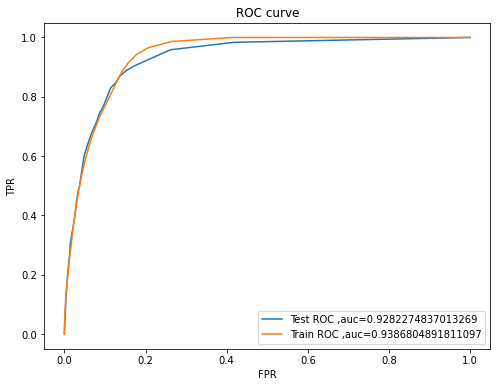

AUC on Test data is 0.9282274837013269
AUC on Train data is 0.9386804891811097
---------------------------


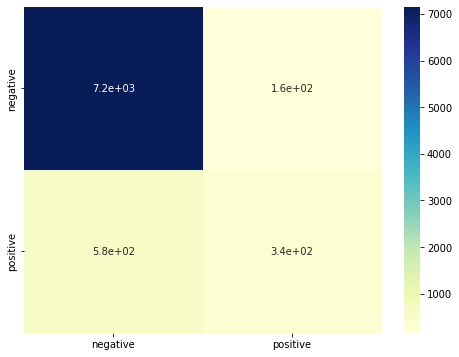

In [56]:
knn_optimal = KNeighborsClassifier(n_neighbors = 41)
knn_optimal.fit(X_train_onehot, y_train_onehot)
pred_test = knn_optimal.predict_proba(X_test_onehot)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test_onehot, pred_test)
pred_train = knn_optimal.predict_proba(X_train_onehot)[:,1]
fpr2,tpr2,thresholds2 = roc_curve(y_train_onehot, pred_train)

aucScoreKNN = roc_auc_score(y_test_onehot,  pred_test)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test_onehot,pred_test)))
x.plot(fpr2, tpr2, label= 'Train ROC ,auc='+str(roc_auc_score(y_train_onehot, pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test_onehot,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train_onehot,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test_onehot, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, cmap="YlGnBu")

In [57]:
knn = ['KNN','KNeighborsClassifier',"k = 41", roc_auc_score(y_train_onehot,pred_train), roc_auc_score(y_test_onehot,pred_test)]
results.loc[1] = knn

In [58]:
results.head()

model            Classifier hyper perameter  Train-AUC  Test-AUC
0  Naïve Bayes            GaussianNB            None   0.835764  0.841563
1          KNN  KNeighborsClassifier          k = 41   0.938680  0.928227

## Logistic Regression

Parameters used for LR is that we get in smaller dataset are  {'C': 0.2782559402207126, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}

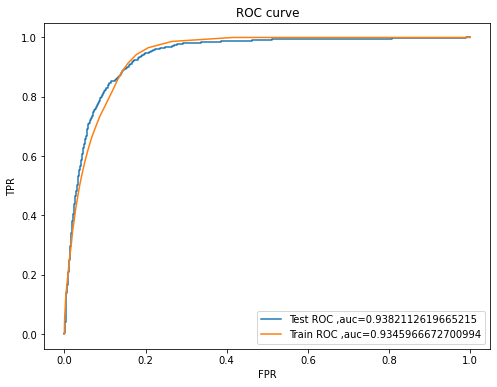

AUC on Test data is 0.9382112619665215
AUC on Train data is 0.9345966672700994
---------------------------


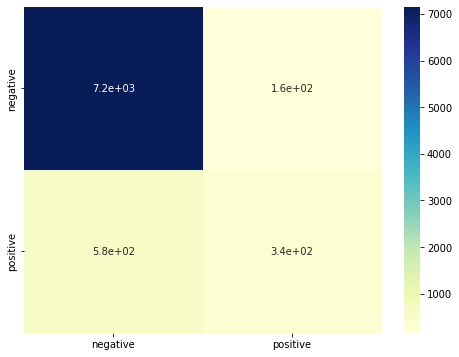

In [59]:
LR_optimal = LogisticRegression(C = 0.2783, max_iter=10000, penalty = 'l1', solver='liblinear')
LR_optimal.fit(X_train_onehot, y_train_onehot)
LR_pred_test = LR_optimal.predict_proba(X_test_onehot)[:,1]
LR_fpr1, LR_tpr1, LR_thresholds1 = roc_curve(y_test_onehot, LR_pred_test)
LR_pred_train = LR_optimal.predict_proba(X_train_onehot)[:,1]
LR_fpr2,LR_tpr2,LR_thresholds2 = roc_curve(y_train_onehot, pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(LR_fpr1, LR_tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test_onehot,LR_pred_test)))
x.plot(LR_fpr2, LR_tpr2, label= 'Train ROC ,auc='+str(roc_auc_score(y_train_onehot, LR_pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test_onehot,LR_pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train_onehot,LR_pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test_onehot, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, cmap="YlGnBu")

In [60]:
LR = ['Logistic Regression','LogisticRegressionClassifier',"C =0.278, max_iter=10000, 'L1', solver='liblinear'", roc_auc_score(y_train_onehot,LR_pred_train), roc_auc_score(y_test_onehot,LR_pred_test)]
results.loc[2] = LR

In [61]:
results.head()

model                    Classifier  \
0          Naïve Bayes                    GaussianNB   
1                  KNN          KNeighborsClassifier   
2  Logistic Regression  LogisticRegressionClassifier   

                                     hyper perameter  Train-AUC  Test-AUC  
0                                               None   0.835764  0.841563  
1                                             k = 41   0.938680  0.928227  
2  C =0.278, max_iter=10000, 'L1', solver='liblin...   0.934597  0.938211

1. Logistic Regression gives a test auc score of 0. which is fairly good.
2. There is a gap between the train auc and test auc, which stands for there is a overfitting on the training set.
3. The recall of Logistic Regression is 0.4079, which is bad.

## SVM

Parameters used for SVM is that we get in smaller datase {'C'= 1, kernel = 'linear', probability=True}

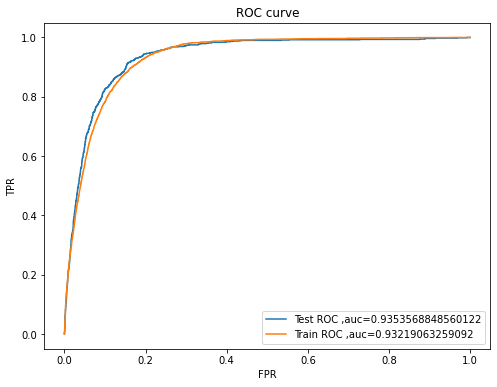

AUC on Test data is 0.9353568848560122
AUC on Train data is 0.93219063259092
---------------------------


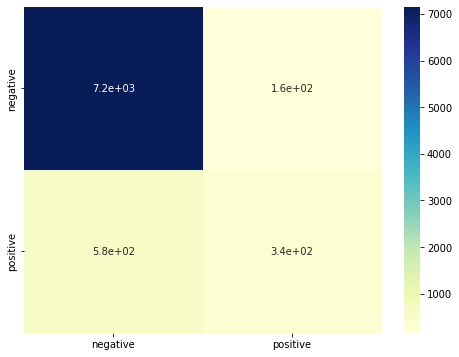

In [62]:
SVM_optimal = SVC(C = 1, kernel = 'linear', probability=True)
SVM_optimal.fit(X_train_onehot, y_train_onehot)
SVM_pred_test = SVM_optimal.predict_proba(X_test_onehot)[:,1]
SVM_fpr1, SVM_tpr1, SVM_thresholds1 = roc_curve(y_test_onehot, SVM_pred_test)
SVM_pred_train = SVM_optimal.predict_proba(X_train_onehot)[:,1]
SVM_fpr2, SVM_tpr2, SVM_thresholds2 = roc_curve(y_train_onehot, SVM_pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(SVM_fpr1, SVM_tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test_onehot, SVM_pred_test)))
x.plot(SVM_fpr2, SVM_tpr2, label= 'Train ROC ,auc='+str(roc_auc_score(y_train_onehot, SVM_pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test_onehot,SVM_pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train_onehot,SVM_pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test_onehot, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, cmap="YlGnBu")

In [63]:
SVM = ['SVM','SVMClassifier',"C = 1, kernel = 'linear'", roc_auc_score(y_train_onehot,SVM_pred_train), roc_auc_score(y_test_onehot,SVM_pred_test)]
results.loc[3] = SVM

In [64]:
results.head()

model                    Classifier  \
0          Naïve Bayes                    GaussianNB   
1                  KNN          KNeighborsClassifier   
2  Logistic Regression  LogisticRegressionClassifier   
3                  SVM                 SVMClassifier   

                                     hyper perameter  Train-AUC  Test-AUC  
0                                               None   0.835764  0.841563  
1                                             k = 41   0.938680  0.928227  
2  C =0.278, max_iter=10000, 'L1', solver='liblin...   0.934597  0.938211  
3                           C = 1, kernel = 'linear'   0.932191  0.935357

## Decision Tree

Parameters used for DT is that we get in smaller datase {criterion= 'entropy', max_depth= 4, min_samples_leaf=1, min_samples_split = 2}

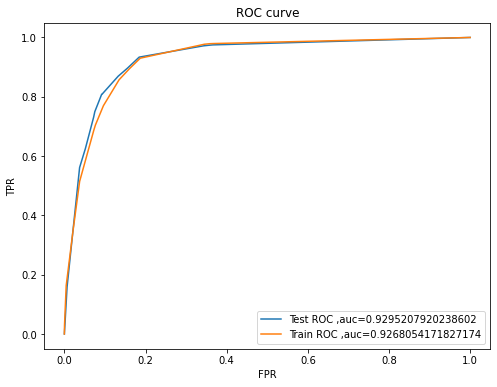

AUC on Test data is 0.9295207920238602
AUC on Train data is 0.9268054171827174
---------------------------


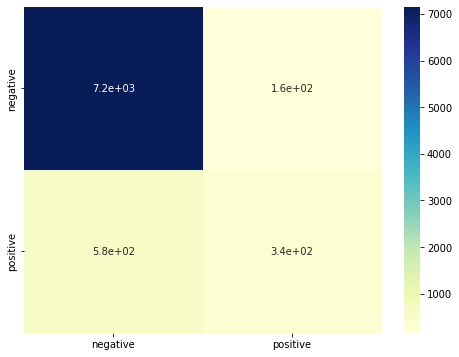

In [65]:
DT_optimal = DecisionTreeClassifier(criterion= 'entropy', max_depth= 4, min_samples_leaf=1, min_samples_split = 2)
DT_optimal.fit(X_train_onehot, y_train_onehot)
DT_pred_test = DT_optimal.predict_proba(X_test_onehot)[:,1]
DT_fpr1, DT_tpr1, DT_thresholds1 = roc_curve(y_test_onehot, DT_pred_test)
DT_pred_train = DT_optimal.predict_proba(X_train_onehot)[:,1]
DT_fpr2, DT_tpr2, DT_thresholds2 = roc_curve(y_train_onehot, DT_pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(DT_fpr1, DT_tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test_onehot, DT_pred_test)))
x.plot(DT_fpr2, DT_tpr2, label= 'Train ROC ,auc='+str(roc_auc_score(y_train_onehot, DT_pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

DT_train_auc = roc_auc_score(y_train_onehot,DT_pred_train)
DT_test_auc = roc_auc_score(y_test_onehot,DT_pred_test)

print("AUC on Test data is " +str(roc_auc_score(y_test_onehot,DT_pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train_onehot,DT_pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test_onehot, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, cmap="YlGnBu")

In [66]:
from sklearn import tree
plt.figure(figsize=(20, 16), dpi = 1200)
tree.plot_tree(DT_optimal)

[Text(0.5, 0.9, 'X[13] <= -1.099\nentropy = 0.509\nsamples = 32950\nvalue = [29229, 3721]'),
 Text(0.25, 0.7, 'X[4] <= -0.385\nentropy = 0.991\nsamples = 3997\nvalue = [2227, 1770]'),
 Text(0.125, 0.5, 'X[4] <= -0.697\nentropy = 0.614\nsamples = 1392\nvalue = [1181, 211]'),
 Text(0.0625, 0.3, 'X[8] <= 0.5\nentropy = 0.165\nsamples = 329\nvalue = [321, 8]'),
 Text(0.03125, 0.1, 'entropy = 0.057\nsamples = 308\nvalue = [306, 2]'),
 Text(0.09375, 0.1, 'entropy = 0.863\nsamples = 21\nvalue = [15, 6]'),
 Text(0.1875, 0.3, 'X[8] <= 0.5\nentropy = 0.703\nsamples = 1063\nvalue = [860, 203]'),
 Text(0.15625, 0.1, 'entropy = 0.627\nsamples = 886\nvalue = [747, 139]'),
 Text(0.21875, 0.1, 'entropy = 0.944\nsamples = 177\nvalue = [113, 64]'),
 Text(0.375, 0.5, 'X[6] <= 1.689\nentropy = 0.972\nsamples = 2605\nvalue = [1046, 1559]'),
 Text(0.3125, 0.3, 'X[4] <= -0.03\nentropy = 1.0\nsamples = 1865\nvalue = [914, 951]'),
 Text(0.28125, 0.1, 'entropy = 0.962\nsamples = 694\nvalue = [426, 268]'),
 Text

In [67]:
#Top important features
all_features = X_train_onehot.columns

DT_feat = DT_optimal.feature_importances_
features = np.argsort(DT_feat)[::-1]
for i in features[0:20]:
    print(all_features[i])

duration
nr.employed
cons.conf.idx
pdays
poutcome
cons.price.idx
day_of_week_wed
job_entrepreneur
job_unemployed
job_technician
job_student
job_services
job_self-employed
job_retired
job_management
job_housemaid
euribor3m
job_blue-collar
job_admin.
marital_divorced


#### Notes:
1. As it is shown in the decision tree above, the top 5 features that have an impact on deposit is duration, nr.employed , cons.conf.idx, age and euribor3m. 3 out of 5 features is macroeconomic data.
2. Decision Tree model has a fair performance compared to other models

In [68]:
DT = ['DecisionTree','DecisionTreeClassifier',"criterion= 'entropy', max_depth= 4, min_samples_leaf=1, min_samples_split = 2", DT_train_auc, DT_test_auc]
results.loc[4] = DT

In [69]:
results.head()

model                    Classifier  \
0          Naïve Bayes                    GaussianNB   
1                  KNN          KNeighborsClassifier   
2  Logistic Regression  LogisticRegressionClassifier   
3                  SVM                 SVMClassifier   
4         DecisionTree        DecisionTreeClassifier   

                                     hyper perameter  Train-AUC  Test-AUC  
0                                               None   0.835764  0.841563  
1                                             k = 41   0.938680  0.928227  
2  C =0.278, max_iter=10000, 'L1', solver='liblin...   0.934597  0.938211  
3                           C = 1, kernel = 'linear'   0.932191  0.935357  
4  criterion= 'entropy', max_depth= 4, min_sample...   0.926805  0.929521

## Random Forest

Parameters used for RF is that we get in smaller datase {bootstrap= True, max_depth= 10, n_estimators = 2000}

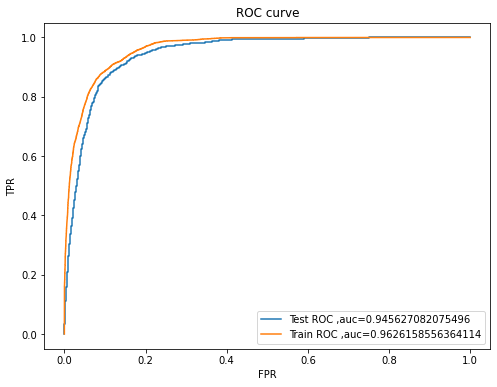

AUC on Test data is 0.945627082075496
AUC on Train data is 0.9626158556364114
---------------------------


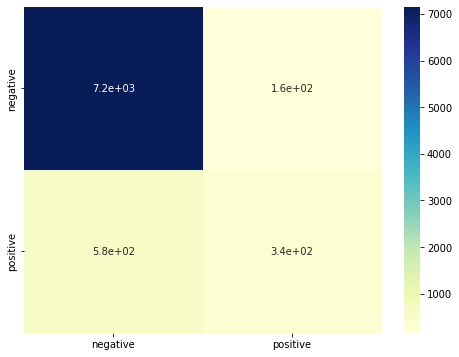

In [70]:
RF_optimal = RandomForestClassifier(bootstrap= True, max_depth= 10, n_estimators = 2000)
RF_optimal.fit(X_train_onehot, y_train_onehot)
RF_pred_test = RF_optimal.predict_proba(X_test_onehot)[:,1]
RF_fpr1, RF_tpr1, RF_thresholds1 = roc_curve(y_test_onehot, RF_pred_test)
RF_pred_train = RF_optimal.predict_proba(X_train_onehot)[:,1]
RF_fpr2, RF_tpr2, RF_thresholds2 = roc_curve(y_train_onehot, RF_pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(RF_fpr1, RF_tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test_onehot, RF_pred_test)))
x.plot(RF_fpr2, RF_tpr2, label= 'Train ROC ,auc='+str(roc_auc_score(y_train_onehot, RF_pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

RF_train_auc = roc_auc_score(y_train_onehot,RF_pred_train)
RF_test_auc = roc_auc_score(y_test_onehot,RF_pred_test)

print("AUC on Test data is " +str(roc_auc_score(y_test_onehot,RF_pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train_onehot,RF_pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test_onehot, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, cmap="YlGnBu")

In [71]:
#Top important features
all_features = X_train_onehot.columns

RF_feat = RF_optimal.feature_importances_
RF_features = np.argsort(RF_feat)[::-1]
for i in RF_features[0:20]:
    print(all_features[i])

duration
euribor3m
nr.employed
pdays
poutcome
emp.var.rate
cons.conf.idx
cons.price.idx
age
previous
campaign
month_oct
month_mar
contact_telephone
contact_cellular
month_may
month_apr
day_of_week_mon
housing
loan


In [72]:
RF = ['RandomForest','RandomForestClassifier',"max_depth= 10, n_estimators = 2000", RF_train_auc, RF_test_auc]
results.loc[5] = RF

In [73]:
results

model                    Classifier  \
0          Naïve Bayes                    GaussianNB   
1                  KNN          KNeighborsClassifier   
2  Logistic Regression  LogisticRegressionClassifier   
3                  SVM                 SVMClassifier   
4         DecisionTree        DecisionTreeClassifier   
5         RandomForest        RandomForestClassifier   

                                     hyper perameter  Train-AUC  Test-AUC  
0                                               None   0.835764  0.841563  
1                                             k = 41   0.938680  0.928227  
2  C =0.278, max_iter=10000, 'L1', solver='liblin...   0.934597  0.938211  
3                           C = 1, kernel = 'linear'   0.932191  0.935357  
4  criterion= 'entropy', max_depth= 4, min_sample...   0.926805  0.929521  
5                 max_depth= 10, n_estimators = 2000   0.962616  0.945627

## XGBoost

Parameters used for XGBoost is that we get in smaller datase {eta= 0.1, min_child_weight= 4, subsample= 0.7}

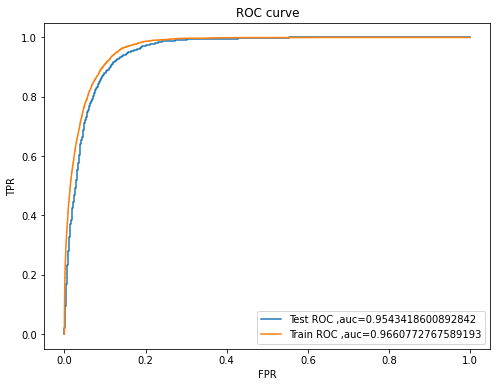

AUC on Test data is 0.9543418600892842
AUC on Train data is 0.9660772767589193
---------------------------


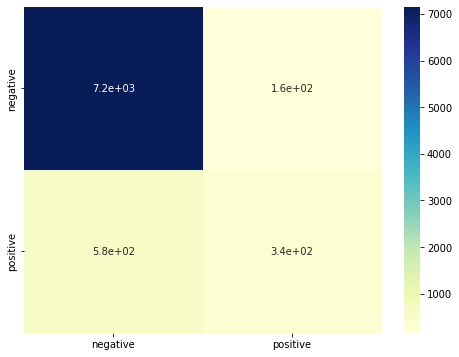

In [74]:
XGB_optimal = XGBClassifier(eta= 0.1, min_child_weight= 4, subsample= 0.7)
XGB_optimal.fit(X_train_onehot, y_train_onehot)
XGB_pred_test = XGB_optimal.predict_proba(X_test_onehot)[:,1]
XGB_fpr1, XGB_tpr1, XGB_thresholds1 = roc_curve(y_test_onehot, XGB_pred_test)
XGB_pred_train = XGB_optimal.predict_proba(X_train_onehot)[:,1]
XGB_fpr2, XGB_tpr2, XGB_thresholds2 = roc_curve(y_train_onehot, XGB_pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(XGB_fpr1, XGB_tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test_onehot, XGB_pred_test)))
x.plot(XGB_fpr2, XGB_tpr2, label= 'Train ROC ,auc='+str(roc_auc_score(y_train_onehot, XGB_pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

XGB_train_auc = roc_auc_score(y_train_onehot,XGB_pred_train)
XGB_test_auc = roc_auc_score(y_test_onehot,XGB_pred_test)

print("AUC on Test data is " +str(roc_auc_score(y_test_onehot,XGB_pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train_onehot,XGB_pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test_onehot, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, cmap="YlGnBu")

In [75]:
#Top important features
all_features = X_train_onehot.columns

XGB_feat = XGB_optimal.feature_importances_
XGB_features = np.argsort(XGB_feat)[::-1]
for i in XGB_features[0:20]:
    print(all_features[i])

nr.employed
duration
cons.conf.idx
month_oct
emp.var.rate
poutcome
pdays
month_may
euribor3m
contact_cellular
default
job_blue-collar
cons.price.idx
day_of_week_wed
month_mar
month_sep
day_of_week_fri
education_university.degree
day_of_week_tue
job_housemaid


<AxesSubplot:>

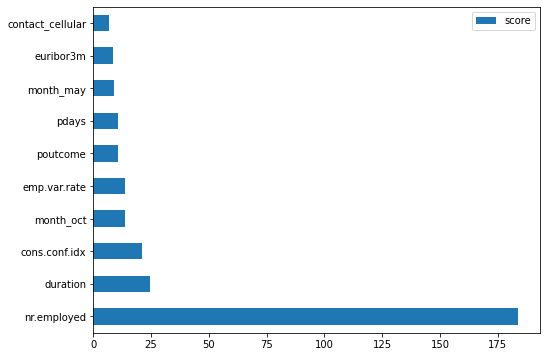

In [76]:
feature_important = XGB_optimal.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data[:10].plot(kind='barh')

In [77]:
XGB = ['XGBoost','XGBoostClassifier',"eta= 0.1, min_child_weight= 4, subsample= 0.7", XGB_train_auc, XGB_test_auc]
results.loc[6] = XGB

In [78]:
results

model                    Classifier  \
0          Naïve Bayes                    GaussianNB   
1                  KNN          KNeighborsClassifier   
2  Logistic Regression  LogisticRegressionClassifier   
3                  SVM                 SVMClassifier   
4         DecisionTree        DecisionTreeClassifier   
5         RandomForest        RandomForestClassifier   
6              XGBoost             XGBoostClassifier   

                                     hyper perameter  Train-AUC  Test-AUC  
0                                               None   0.835764  0.841563  
1                                             k = 41   0.938680  0.928227  
2  C =0.278, max_iter=10000, 'L1', solver='liblin...   0.934597  0.938211  
3                           C = 1, kernel = 'linear'   0.932191  0.935357  
4  criterion= 'entropy', max_depth= 4, min_sample...   0.926805  0.929521  
5                 max_depth= 10, n_estimators = 2000   0.962616  0.945627  
6      eta= 0.1, min_child_weight= 4, subsample= 0.7   0.966077  0.954342

## LightGBM

Parameters used for LightGBM is that we get in smaller datase {max_depth = 5, num_leaves = 5}

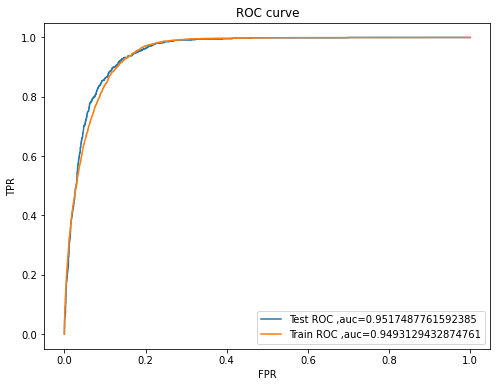

AUC on Test data is 0.9517487761592385
AUC on Train data is 0.9493129432874761
---------------------------


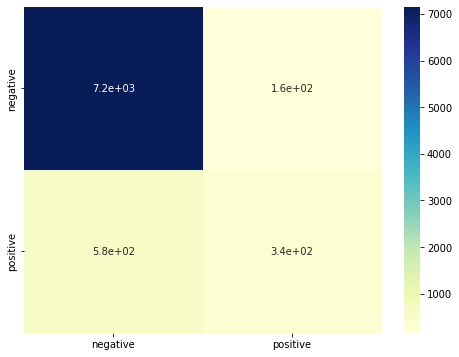

In [79]:
LGBM_optimal = LGBMClassifier(max_depth = 5, num_leaves = 5)
LGBM_optimal.fit(X_train_onehot, y_train_onehot)
LGBM_pred_test = LGBM_optimal.predict_proba(X_test_onehot)[:,1]
LGBM_fpr1, LGBM_tpr1, LGBM_thresholds1 = roc_curve(y_test_onehot, LGBM_pred_test)
LGBM_pred_train = LGBM_optimal.predict_proba(X_train_onehot)[:,1]
LGBM_fpr2, LGBM_tpr2, LGBM_thresholds2 = roc_curve(y_train_onehot, LGBM_pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(LGBM_fpr1, LGBM_tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test_onehot, LGBM_pred_test)))
x.plot(LGBM_fpr2, LGBM_tpr2, label= 'Train ROC ,auc='+str(roc_auc_score(y_train_onehot, LGBM_pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

LGBM_train_auc = roc_auc_score(y_train_onehot,LGBM_pred_train)
LGBM_test_auc = roc_auc_score(y_test_onehot,LGBM_pred_test)

print("AUC on Test data is " +str(roc_auc_score(y_test_onehot, LGBM_pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train_onehot, LGBM_pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test_onehot, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, cmap="YlGnBu")

In [80]:
#Top important features
all_features = X_train_onehot.columns

LGBM_feat = LGBM_optimal.feature_importances_
LGBM_features = np.argsort(LGBM_feat)[::-1]
for i in LGBM_features[0:20]:
    print(all_features[i])

duration
euribor3m
emp.var.rate
cons.conf.idx
poutcome
age
month_may
nr.employed
pdays
contact_cellular
month_mar
month_oct
campaign
default
job_blue-collar
cons.price.idx
day_of_week_mon
education_university.degree
month_nov
month_apr


In [81]:
LGBM = ['LightGBM','LGBMClassifier',"max_depth = 5, num_leaves = 5", LGBM_train_auc, LGBM_test_auc]
results.loc[7] = LGBM

In [82]:
results

model                    Classifier  \
0          Naïve Bayes                    GaussianNB   
1                  KNN          KNeighborsClassifier   
2  Logistic Regression  LogisticRegressionClassifier   
3                  SVM                 SVMClassifier   
4         DecisionTree        DecisionTreeClassifier   
5         RandomForest        RandomForestClassifier   
6              XGBoost             XGBoostClassifier   
7             LightGBM                LGBMClassifier   

                                     hyper perameter  Train-AUC  Test-AUC  
0                                               None   0.835764  0.841563  
1                                             k = 41   0.938680  0.928227  
2  C =0.278, max_iter=10000, 'L1', solver='liblin...   0.934597  0.938211  
3                           C = 1, kernel = 'linear'   0.932191  0.935357  
4  criterion= 'entropy', max_depth= 4, min_sample...   0.926805  0.929521  
5                 max_depth= 10, n_estimators = 2000   0.962616  0.945627  
6      eta= 0.1, min_child_weight= 4, subsample= 0.7   0.966077  0.954342  
7                      max_depth = 5, num_leaves = 5   0.949313  0.951749

## ROC Curve

In [84]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [85]:
# add FPR, TPR and AUC for every algorithm
result_table=result_table.append({'classifiers':"Naive Bayes",'fpr':fprNB_test,'tpr':tprNB_test,'auc':test_auc_NB}, ignore_index=True)
result_table=result_table.append({'classifiers':"KNN Classifier",'fpr':fpr1,'tpr':tpr1,'auc':aucScoreKNN}, ignore_index=True)
result_table=result_table.append({'classifiers':"Logistic Regression",'fpr':LR_fpr1,'tpr':LR_tpr1,'auc':roc_auc_score(y_test_onehot,LR_pred_test)}, ignore_index=True)

#result_table=result_table.append({'classifiers':"LR with Poly degree 2",'fpr':fprLRP2,'tpr':tprLRP2,'auc':aucScoreLRP2}, ignore_index=True)
#result_table=result_table.append({'classifiers':"LR with Poly degree 3",'fpr':fprLRP3,'tpr':tprLRP3,'auc':aucScoreLRP3}, ignore_index=True)

result_table=result_table.append({'classifiers':"SVM Classifier",'fpr':SVM_fpr1,'tpr':SVM_tpr1,'auc':roc_auc_score(y_test_onehot,SVM_pred_test)}, ignore_index=True)
result_table=result_table.append({'classifiers':"Deciosion Tree",'fpr':DT_fpr1,'tpr':DT_tpr1,'auc':roc_auc_score(y_test_onehot,DT_pred_test)}, ignore_index=True)
result_table=result_table.append({'classifiers':"Random Forest",'fpr':RF_fpr1,'tpr':RF_tpr1,'auc':roc_auc_score(y_test_onehot,RF_pred_test)}, ignore_index=True)
result_table=result_table.append({'classifiers':"XGBoost Classifier",'fpr':XGB_fpr1,'tpr':XGB_tpr1,'auc':roc_auc_score(y_test_onehot,XGB_pred_test)}, ignore_index = True)
result_table=result_table.append({'classifiers':"LightGBM Classifier",'fpr':LGBM_fpr1,'tpr':LGBM_tpr1,'auc':roc_auc_score(y_test_onehot,LGBM_pred_test)}, ignore_index = True)

In [86]:
result_table.set_index('classifiers', inplace=True)

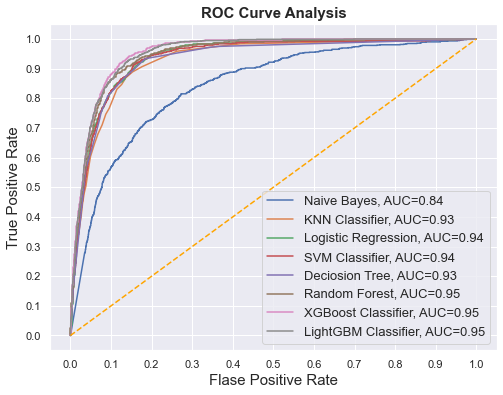

In [87]:
# Plotting all ROC in one plot

sns.set()

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.2f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

**Notes:**
- All the models outperform a 10% more AUC score than Naïve Bayes, i.e. baseline model， and the best 3 model reach a 95% AUC score.
- LightGBM and XGBoost also get good results in the full dataset as they did in small dataset.